In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio 
import PIL.Image as Image
import os
import glob
import scipy.ndimage as ndimage
import scipy.signal as signal
import cv2
# from SARA_cornell_funcs import CropA

def CorrFxn(ims1,ims2,multimodes=True,singlemode='nearest',cval=0,plotting=False):
    """ This code will correlate the two sums of the images and determine the shift in pixels
    ims1: (array) The sum of the left image along one axis
    ims2: (array) The sum of the right image along one axis
    
    returns the shift between the two image sums in number of pixels
    """
    modes = ['reflect','constant','nearest','mirror','wrap']
    corrs = []
    pixelshifts = []
    if multimodes:
        for m in modes:
            corr = ndimage.correlate(ims2,ims1,mode=m)
            corrs.append(corr)
            pixelshift = 0.5*len(ims1) - np.arange(len(corr))[corr==max(corr)]
            pixelshifts.append(pixelshift)
    #     print(m)
    #     print(np.arange(len(corr))[corr==max(corr)])
    #     print('')
        if plotting:
            fig,ax = plt.subplots(len(modes),1,constrained_layout=True)
            for i in np.arange(len(modes)):
                ax[i].plot(corrs[i])
                ax[i].set_title(modes[i])
            plt.show()
            plt.close()
        return np.array(pixelshifts), corrs, modes
    else:
        corr = ndimage.correlate(ims2,ims1,mode=singlemode,cval=cval)
        pixelshift = 0.5*len(ims1) - np.arange(len(corr))[corr==max(corr)]
        return pixelshift, corr
    
def cross_image(im1, im2):
    # get rid of the color channels by performing a grayscale transform
    # the type cast into 'float' is to avoid overflows
    im1_gray = np.sum(im1.astype('float'), axis=2)
    im2_gray = np.sum(im2.astype('float'), axis=2)

    # get rid of the averages, otherwise the results are not good
    im1_gray -= np.mean(im1_gray)
    im2_gray -= np.mean(im2_gray)

    # calculate the correlation image; note the flipping of onw of the images
    return signal.fftconvolve(im1_gray, im2_gray[::-1][::-1])

The images collected will be a 3x3 array of some spatial shift around 0, specified by the user. These images can be used to calculate a pixel size for the current camera setting.

In [42]:
# #this is the only required user input. Everything else should be processed by the code
# filepath = '/home/duncan/Documents/CHESS/2022_Spring/PixelSizeCalibration/'
# plotting = True
# CalibImg = {}
# xy = []
# for idx,file in enumerate(glob.glob(filepath+'*.bmp')):
#     fn = os.path.basename(file)
#     fn = fn.split(',')
# #     print(fn)
    
#     #all positions reported in um
#     xpos = int(float(fn[0])*1000) 
#     ypos = int(float(fn[1][:-4])*1000)
# #     xpos = int(fn[0])
# #     ypos = int(fn[1][:-4])
#     print(xpos,ypos)
    
#     xy.append([xpos,ypos])
#     CalibImg[f'x_{xpos}_y_{ypos}'] = np.array(imageio.imread(file),dtype=float)

# xy = np.array(xy)    
# stageshift = abs(xy[0,0]-xy[1,0])
# xpos = sorted(np.unique(xy[:,0]))
# ypos = sorted(np.unique(xy[:,1]))
# perms = [[0,1],[0,2],[1,2]]

# hFOV = []
# # Horizontal FOV pixel size
# for y in ypos:
#     for idx in perms:
#         im1 = CalibImg[f'x_{xpos[idx[0]]}_y_{y}'][250:750,:]
#         im2 = CalibImg[f'x_{xpos[idx[1]]}_y_{y}'][250:750,:]
        
# #         #manually rotate for now:
# #         rows,cols = im1.shape
# #         M = cv2.getRotationMatrix2D((cols/2,rows/2),135,1)
# #         #rotation of the images
# #         im1 = cv2.warpAffine(im1,M,(cols,rows))
# #         im2 = cv2.warpAffine(im2,M,(cols,rows))
        
#         x1 = np.arange(im1.shape[1])
#         x2 = np.arange(im2.shape[1])
#         if len(im1.shape)>=3:
#             ims1 = np.array(np.average(im1,axis=(0,2)),dtype=float)
#             ims2 = np.array(np.average(im2,axis=(0,2)),dtype=float)
#         else:
#             ims1 = np.array(np.average(im1,axis=0),dtype=float)
#             ims2 = np.array(np.average(im2,axis=0),dtype=float)
#         m1 = np.mean(ims1)
#         m2 = np.mean(ims2)
#     #     print(m1,m2)
#         ims1 = ims1-m1
#         ims2 = ims2-m1

#         dist = xpos[idx[1]]-xpos[idx[0]]
#         pixelshifts,corr = CorrFxn(ims1=ims1,ims2=ims2,multimodes=False,singlemode='nearest',plotting=False)
#         pixsizes = dist/pixelshifts

#         hFOV.append(pixsizes[0])

#         if plotting:
#             fig,ax = plt.subplots(3,1,constrained_layout=True,dpi=150,figsize=(3.2,6.4))
#             ax[0].imshow(np.array(im1,dtype='uint8'))
#             ax[1].imshow(np.array(im2,dtype='uint8'))
#             ax[2].plot(x1,ims1)
#             ax[2].plot(x2,ims2)
#             ax[2].plot(x1-pixelshifts,ims1)
#             plt.show()
#             plt.close(fig)

#             plt.figure()
#             plt.plot(corr)
#             plt.plot(ndimage.correlate(ims1,ims2))
#             plt.show()
#             plt.close()
# print(hFOV)
# print(f'pixel size is {np.round(np.average(hFOV),decimals=3)} \u03BCm')

# vFOV = []
# plotting=False
# #Horizontal FOV pixel size
# for x in xpos:
#     for idx in perms:
#         im1 = CalibImg[f'x_{x}_y_{ypos[idx[0]]}']
#         im2 = CalibImg[f'x_{x}_y_{ypos[idx[1]]}']  
        
#         x1 = np.arange(im1.shape[0])
#         x2 = np.arange(im2.shape[0])

#         if len(im1.shape)>=3:
#             ims1 = np.array(np.average(im1,axis=(1,2)),dtype=float)
#             ims2 = np.array(np.average(im2,axis=(1,2)),dtype=float)
#         else:
#             ims1 = np.array(np.average(im1,axis=0),dtype=float)
#             ims2 = np.array(np.average(im2,axis=0),dtype=float)
        
#         m1 = np.mean(ims1)
#         m2 = np.mean(ims2)
#     #     print(m1,m2)
#         ims1 = ims1-m1
#         ims2 = ims2-m1


#         dist = ypos[idx[1]]-ypos[idx[0]]
#         pixelshifts,corr = CorrFxn(ims1=ims1,ims2=ims2,multimodes=False,singlemode='nearest',plotting=False)
#         pixsizes = dist/pixelshifts
#     #     print(dist)
#     #     print(pixelshifts)
#     #     print(-pixsizes)
#     #     print('')

#         vFOV.append(pixsizes[0])

#         if plotting:
#             fig,ax = plt.subplots(3,1,constrained_layout=True,dpi=150,figsize=(3.2,6.4))
#             ax[0].imshow(np.array(im1,dtype='uint8'))
#             ax[1].imshow(np.array(im2,dtype='uint8'))
#             ax[2].plot(x1,ims1)
#             ax[2].plot(x2,ims2)
#             ax[2].plot(x1-pixelshifts,ims1)
#             plt.show()
#             plt.close(fig)

#             plt.figure()
#             plt.plot(corr)
#             plt.plot(ndimage.correlate(ims1,ims2))
#             plt.show()
#             plt.close()
# print(vFOV)        
# print(f'pixel size is {-np.round(pixsizes,decimals=3)[0]} \u03BCm')
# print('')
    

## A cross grid of images (x and y axes)

['x_-350_y_0', 'x_0_y_-350', 'x_0_y_0', 'x_0_y_350', 'x_350_y_0']


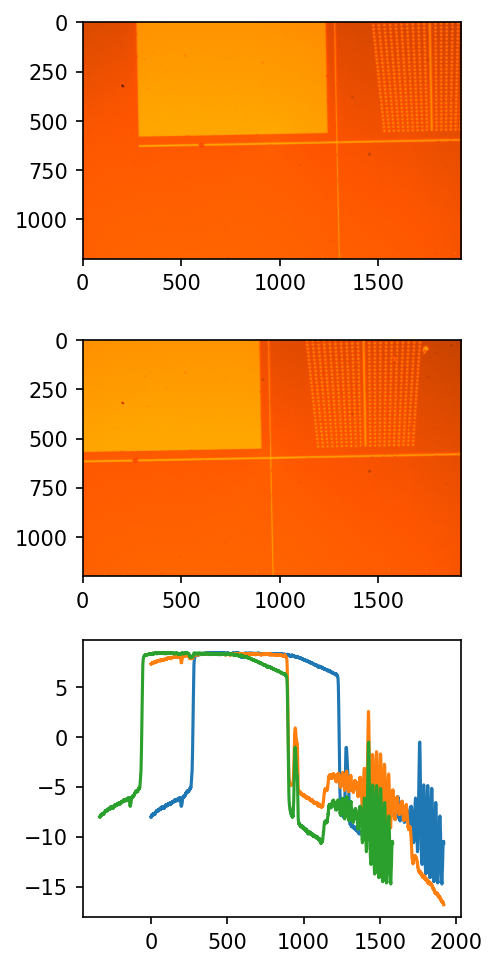

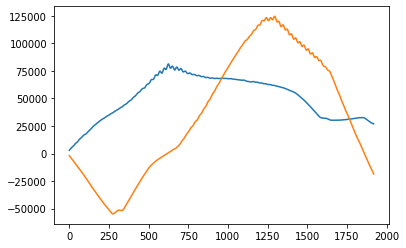

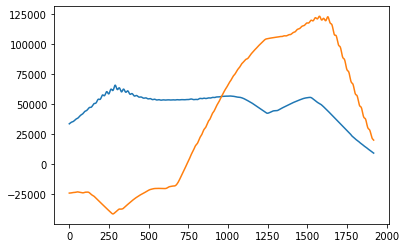

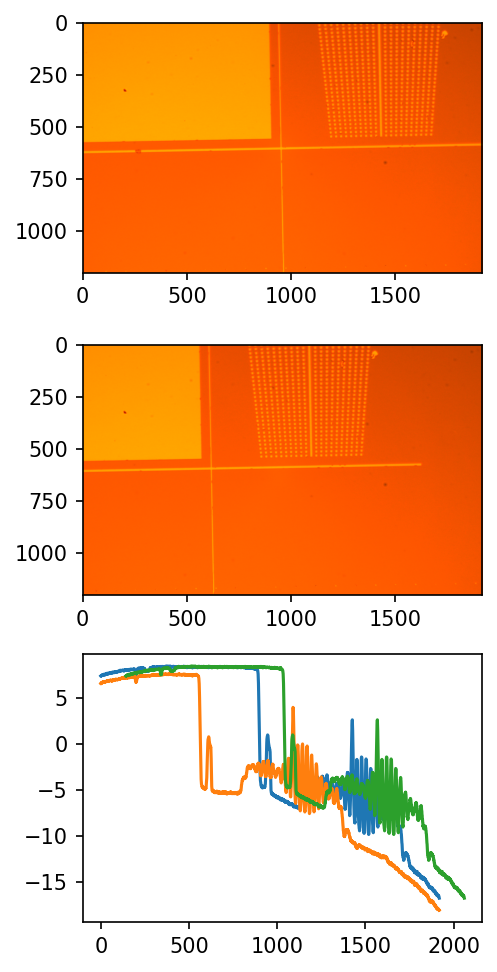

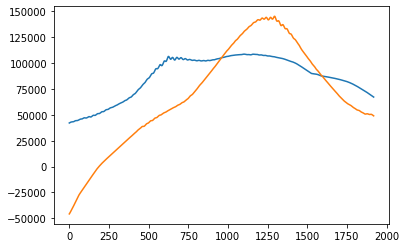

[1.044776119402985, 1.0432190760059612, 2.464788732394366]

In [77]:
filepath = '/home/duncan/Documents/CHESS/2022_Spring/PixelSizeCalibration/350/'
plotting = True
CalibImg = {}
xy = []
for idx,file in enumerate(glob.glob(filepath+'*.bmp')):
    fn = os.path.basename(file)
    fn = fn.split(',')
    
    #all positions reported in um
    xpos = int(float(fn[0])*1000) 
    ypos = int(float(fn[1][:-4])*1000)
    xy.append([xpos,ypos])
    CalibImg[f'x_{xpos}_y_{ypos}'] = np.array(imageio.imread(file),dtype=float)

xy = np.array(xy)    
stageshift = abs(xy[0,0]-xy[1,0])
xpos = sorted(np.unique(xy[:,0]))
ypos = sorted(np.unique(xy[:,1]))
#Hpx
pxx = []
print(sorted(list(CalibImg)))
x_shiftims = [sorted(list(CalibImg))[i] for i in [0,2,4]]
for j, [idx1, idx2] in enumerate(perms):
    key = x_shiftims[j]
#     print(x_shiftims[idx1],x_shiftims[idx2])
    im1 = CalibImg[x_shiftims[idx1]]#[250:750,:]
    im2 = CalibImg[x_shiftims[idx2]]#[250:750,:]

    x1 = float(x_shiftims[idx1].split('_')[1])
    x2 = float(x_shiftims[idx2].split('_')[1])
    if len(im1.shape)>=3:
        ims1 = np.array(np.average(im1,axis=(0,2)),dtype=float)
        ims2 = np.array(np.average(im2,axis=(0,2)),dtype=float)
    else:
        ims1 = np.array(np.average(im1,axis=0),dtype=float)
        ims2 = np.array(np.average(im2,axis=0),dtype=float)
    m1 = np.mean(ims1)
    m2 = np.mean(ims2)
    ims1 = ims1-m1
    ims2 = ims2-m1

    dist = abs(x2-x1)
    pixelshifts,corr = CorrFxn(ims1=ims1,ims2=ims2,multimodes=False,singlemode='nearest',plotting=False)
    pixsizes = dist/abs(pixelshifts)
    pxx.append(pixsizes[0])    
    if plotting:
        fig,ax = plt.subplots(3,1,constrained_layout=True,dpi=150,figsize=(3.2,6.4))
        ax[0].imshow(np.array(im1,dtype='uint8'))
        ax[1].imshow(np.array(im2,dtype='uint8'))
        ax[2].plot(np.arange(im1.shape[1]),ims1)
        ax[2].plot(np.arange(im2.shape[1]),ims2)
        ax[2].plot(np.arange(im1.shape[1])-pixelshifts,ims1)
        plt.show()
        plt.close(fig)

        plt.figure()
        plt.plot(corr)
        plt.plot(ndimage.correlate(ims1,ims2))
        plt.show()
        plt.close()
pxx

['x_0_y_-350', 'x_0_y_0', 'x_0_y_350']


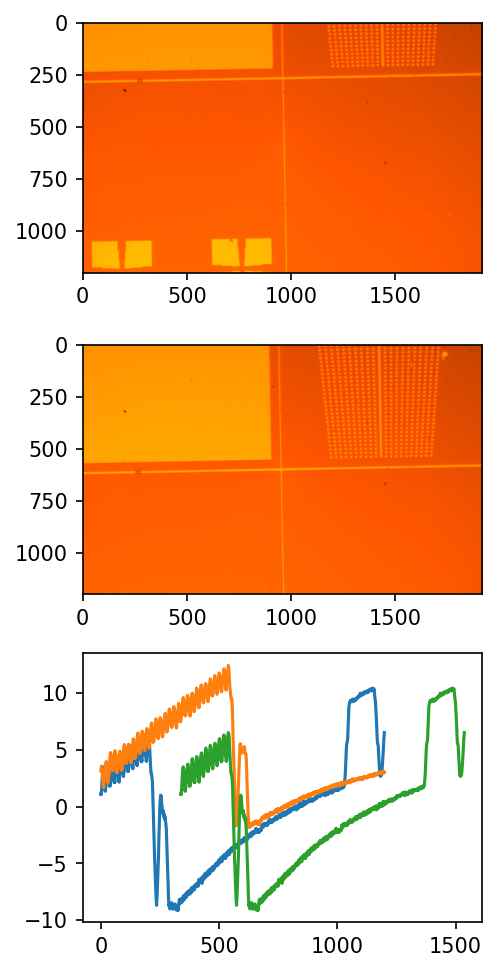

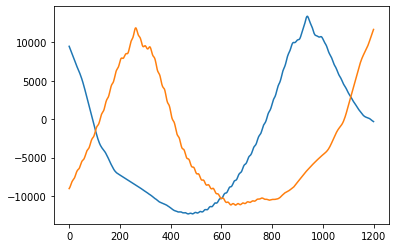

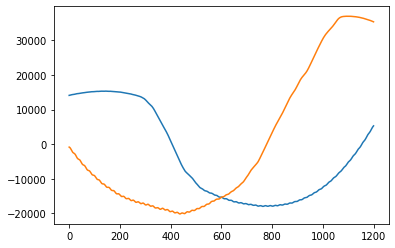

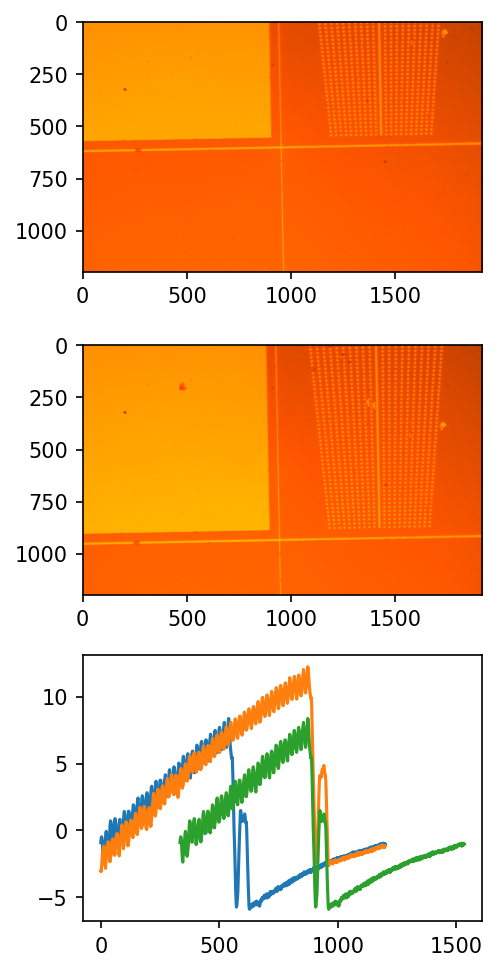

[1.0355029585798816, 1.5350877192982457, 1.0479041916167664]

In [78]:
#Vpx
pxy = []
y_shiftims = [sorted(list(CalibImg))[i] for i in [1,2,3]]
print(y_shiftims)
for j, [idx1, idx2] in enumerate(perms):
    key = y_shiftims[j]
#     print(x_shiftims[idx1],x_shiftims[idx2])
    im1 = CalibImg[y_shiftims[idx1]]#[250:750,:]
    im2 = CalibImg[y_shiftims[idx2]]#[250:750,:]

    y1 = float(y_shiftims[idx1].split('_')[3])
    y2 = float(y_shiftims[idx2].split('_')[3])
    if len(im1.shape)>=3:
        ims1 = np.array(np.average(im1,axis=(1,2)),dtype=float)
        ims2 = np.array(np.average(im2,axis=(1,2)),dtype=float)
    else:
        ims1 = np.array(np.average(im1,axis=1),dtype=float)
        ims2 = np.array(np.average(im2,axis=1),dtype=float)
        
    m1 = np.mean(ims1)
    m2 = np.mean(ims2)
    ims1 = ims1-m1
    ims2 = ims2-m1

    dist = abs(y2-y1)
    pixelshifts,corr = CorrFxn(ims1=ims1,ims2=ims2,multimodes=False,singlemode='nearest',plotting=False)
    pixsizes = dist/abs(pixelshifts)
    pxy.append(pixsizes[0])    
    if plotting:
        fig,ax = plt.subplots(3,1,constrained_layout=True,dpi=150,figsize=(3.2,6.4))
        ax[0].imshow(np.array(im1,dtype='uint8'))
        ax[1].imshow(np.array(im2,dtype='uint8'))
        ax[2].plot(np.arange(im1.shape[0]),ims1)
        ax[2].plot(np.arange(im2.shape[0]),ims2)
        ax[2].plot(np.arange(im1.shape[0])-pixelshifts,ims1)
        plt.show()
        plt.close(fig)

        plt.figure()
        plt.plot(corr)
        plt.plot(ndimage.correlate(ims1,ims2))
        plt.show()
        plt.close()

pxy